<h1 align="center">K-Means Clustering</h1>

### Explainer Video

In [ ]:
from IPython.display import HTML

HTML('<iframe src="https://player.vimeo.com/video/282270114" width="800" height="600" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>'
)

## Central Mall dataset
The "Central mall" collected some information of their 200 customers. Through the membership form they have collected their information of Gender, Age and Annual Income, along with their spending score(The mall computerless spending score for each of their customer based on their mall activity)

Spending Score is a score assigned to the customer based on defined parameters like customer behavior and purchasing data.


The mall wants to understand the customers into different groups so as to guide the marketing team and have them plan the strategy accordingly.

The mall has no idea of what this groups might be. It doesn't even have any idea of how many groups they are looking for. 
And that is specifically what makes this business problem a clustering problem because we dont know what the answers are. We don't know final categories ahead of time. 

So our mission is to find the customer clusters using our knowledge of K-Means Clustering 

In [1]:
# K-Means Clustering

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

#Importing the mall dataset with pandas

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Task 1. Plot the distribution plot for Age, Annual Income (k\\$) and Spending Score (1-100)

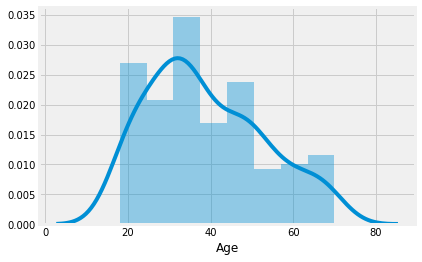

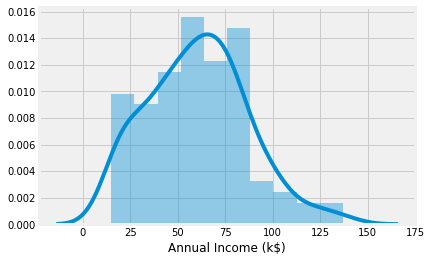

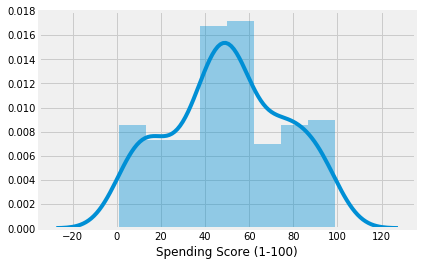

In [5]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
# fig, ax  = plt.subplot()
for i in col:
    sns.distplot(dataset[i])
    plt.show()

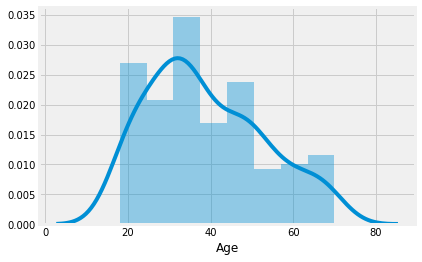

In [3]:
age = dataset['Age']
sns.distplot(age)

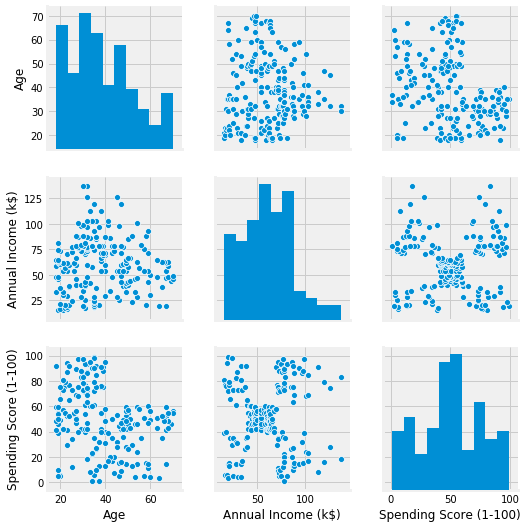

In [9]:
sns.pairplot(dataset[['Age', 'Annual Income (k$)','Spending Score (1-100)']])

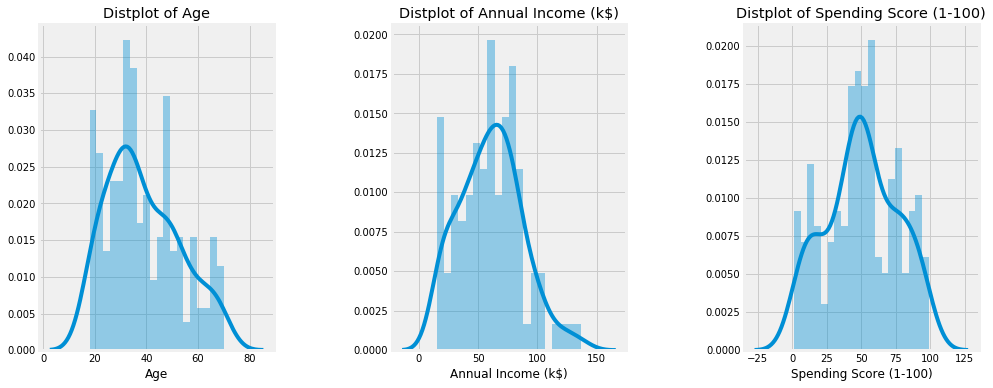

In [12]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataset[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Task 2. Plot the distribution bar plot for Gender Column

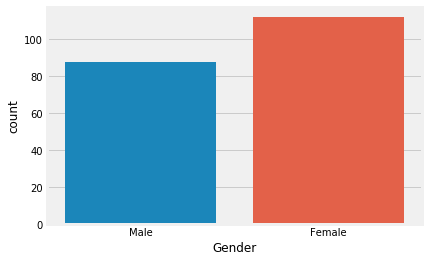

In [11]:
sns.countplot(dataset['Gender'])

### Task 3. Plot the Relation between Age , Annual Income and Spending Score

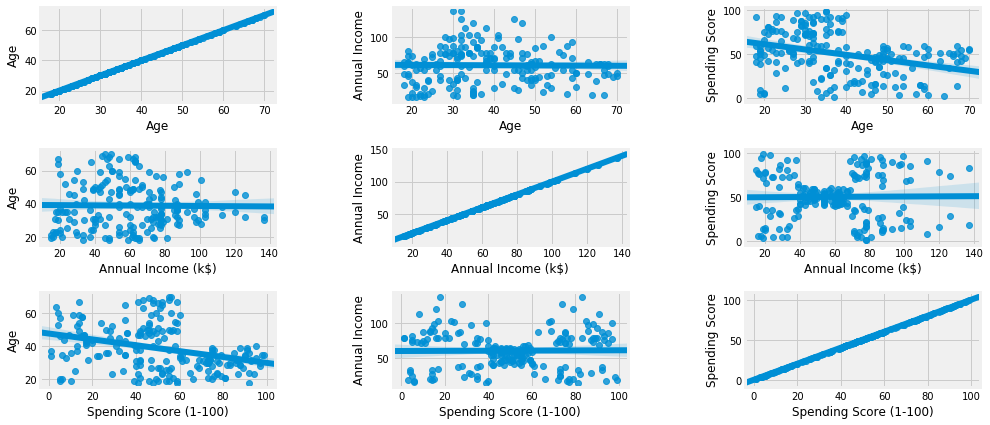

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

### Task 4.  Print the average spending score for men and women

In [14]:
# Create data sets by gender
male_customers = dataset[dataset['Gender'] == 'Male']
female_customers = dataset[dataset['Gender'] == 'Female']

dataset[dataset['Gender'] == 'Male']  ['Spending Score (1-100)'].mean()

# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


###  Task 5. Create an array with two columns as `Annual Income (k)` and `Spending Score (1-100)` and store it in X variable.

In [17]:
X = dataset.iloc[:,[3,4]].values
type(X)

numpy.ndarray

### Task 6. Using the elbow method find the optimal number of clusters

In [24]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Task 7. Plot the graph to visualize the Elbow Method to find the optimal number of cluster 

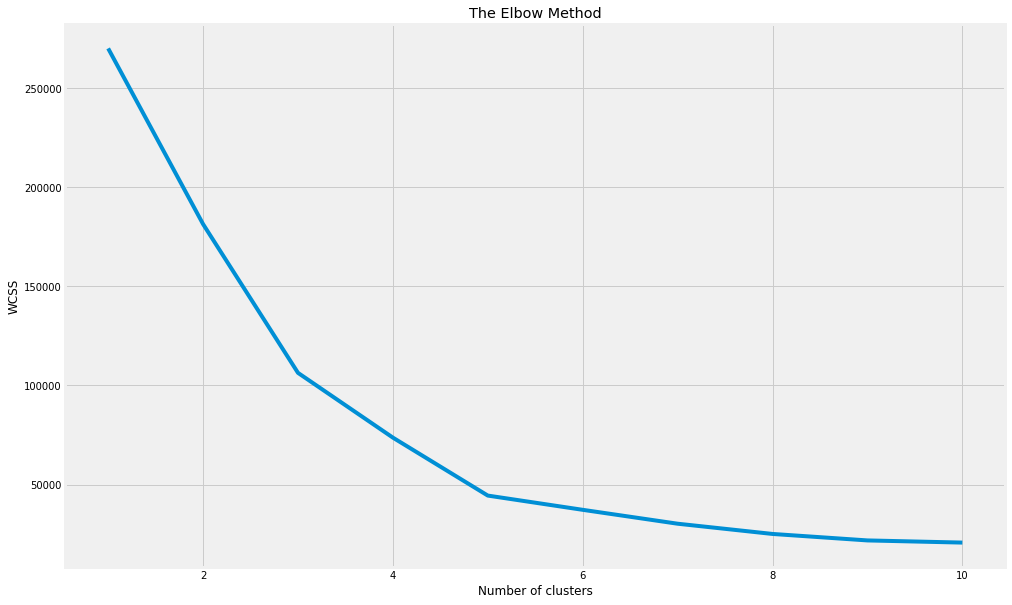

In [25]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.figure(figsize=(15,10))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [38]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [39]:
kmeans.labels_

array([ 3, 19,  8, 19,  3, 19,  8,  5,  8, 19,  8,  5,  8, 19,  8, 19,  3,
       19,  3,  5,  3, 19,  8, 19,  8, 10,  3,  1,  3, 10,  8, 19,  8, 10,
        8, 10,  8, 10, 17, 10, 17, 10, 17,  1, 17,  1,  1, 17, 17, 17,  1,
        1,  1,  1, 17, 17, 18, 17, 18, 18, 18, 18, 18,  1, 18, 18, 18, 18,
       18, 18, 18, 17, 18, 18,  4, 18, 18, 18, 18,  4, 18, 18,  4,  4, 18,
        4, 16, 16, 16,  4, 16,  4,  4,  4,  4, 16,  4,  4,  4,  4,  4,  4,
       16, 16, 16,  4,  4,  4,  4,  4, 16, 16,  4,  4,  4,  4,  4, 16,  4,
       16, 16, 13, 16,  0, 13,  9, 13,  0,  2,  9,  2,  9, 13,  9,  2,  0,
        2,  9,  2,  9,  2,  0, 13,  0,  2,  0, 13,  9, 11,  0, 11,  0, 11,
        9, 11,  0,  2,  9,  2,  9, 13,  0,  2,  0, 11, 14, 11,  0, 11, 14,
       11, 14, 11,  0, 11,  0, 11, 14, 11,  7,  6,  7,  6,  7,  6,  7,  6,
       14,  6,  7,  6, 14,  6,  7, 15, 12, 15, 12, 15, 12])

In [40]:
kmeans.cluster_centers_

array([[ 78.28571429,  90.5       ],
       [ 40.33333333,  58.55555556],
       [ 75.1       ,   6.6       ],
       [ 22.42857143,  34.42857143],
       [ 60.62962963,  45.03703704],
       [ 20.        ,  97.        ],
       [102.        ,  22.57142857],
       [100.5       ,  89.5       ],
       [ 24.58333333,   9.58333333],
       [ 74.2       ,  74.4       ],
       [ 33.14285714,  83.14285714],
       [ 84.41666667,  17.75      ],
       [127.66666667,  78.66666667],
       [ 73.14285714,  35.57142857],
       [ 91.83333333,  69.83333333],
       [127.66666667,  20.66666667],
       [ 62.21428571,  56.14285714],
       [ 41.09090909,  39.09090909],
       [ 49.54545455,  52.45454545],
       [ 20.7       ,  74.7       ]])

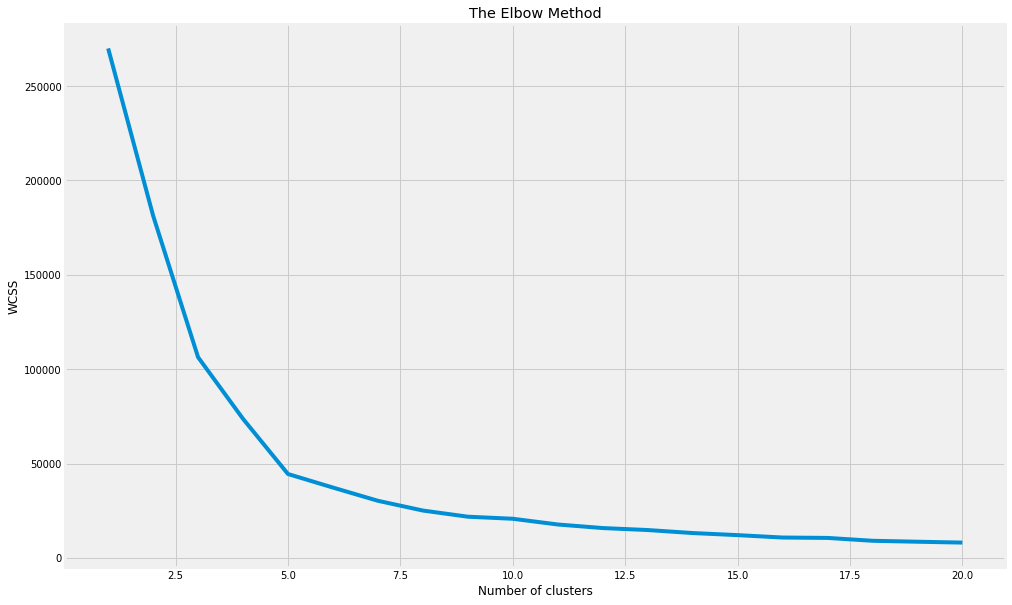

In [27]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.figure(figsize=(15,10))
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

### Task 8.  Applying KMeans to the dataset with the optimal number of cluster

In [28]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)   # Fit for prediction

In [35]:
X[Y_Kmeans==0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [30]:
Y_Kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Task 9. Visualize the Clusters

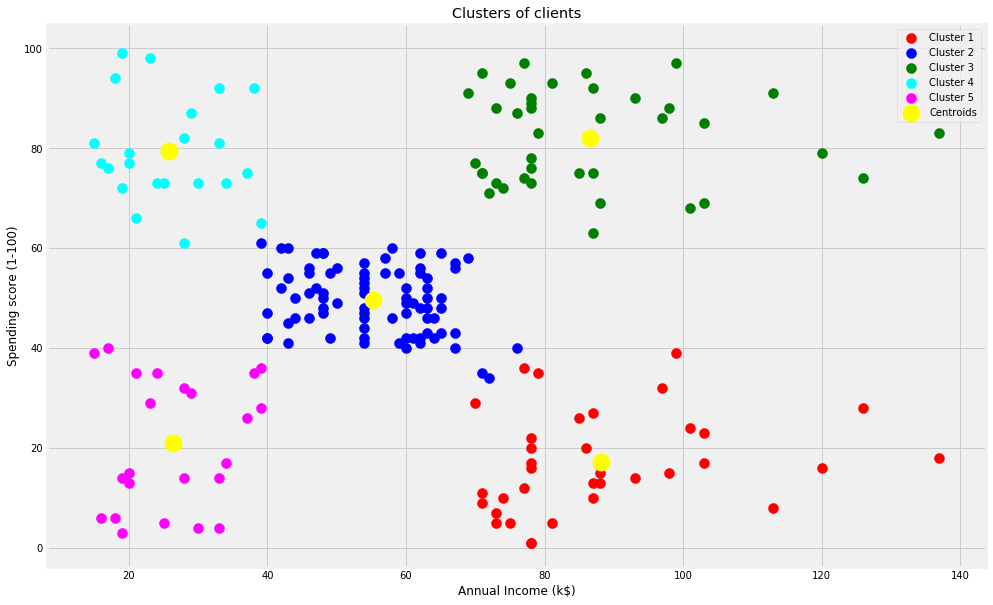

In [36]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

### Task 10. Similarly do it for Age and Spending Score

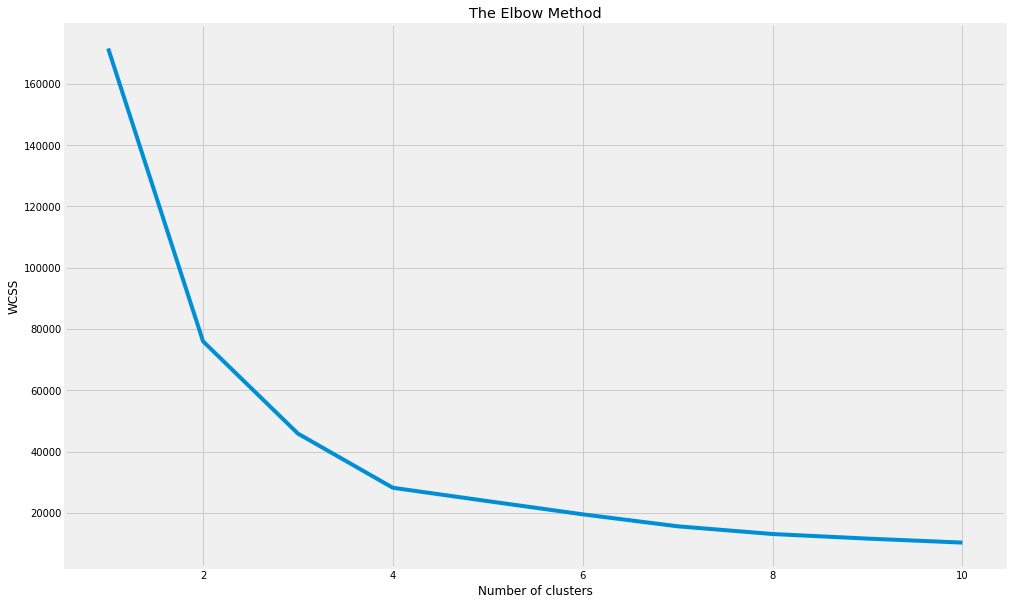

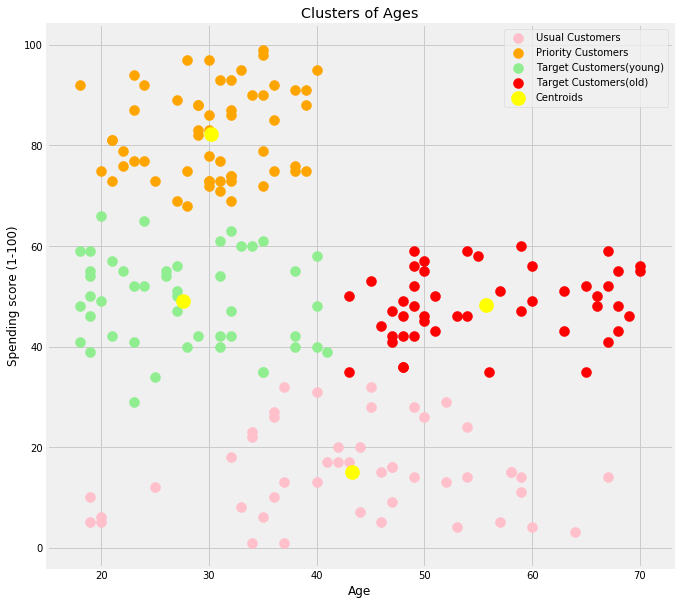

In [37]:
x = dataset.iloc[:, [2, 4]].values
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster 
plt.figure(figsize=(15,10))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_Kmeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
# Visualising the clusters

plt.scatter(x[y_Kmeans == 0, 0], x[y_Kmeans == 0,1],s = 100, c='pink', label = 'Usual Customers')

plt.scatter(x[y_Kmeans == 1, 0], x[y_Kmeans == 1,1],s = 100, c='orange', label = 'Priority Customers')

plt.scatter(x[y_Kmeans == 2, 0], x[y_Kmeans == 2,1],s = 100, c='lightgreen', label = 'Target Customers(young)')

plt.scatter(x[y_Kmeans == 3, 0], x[y_Kmeans == 3,1],s = 100, c='red', label = 'Target Customers(old)')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of Ages')
plt.xlabel('Age')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

## Quiz

Q1. K-Means is which type of learning algorithm?

```python
A. Supervised
B. Unsupervised
C. Reinforcement
```

Q2. Which of the following algorithm has similarity with K-Means?
```python
A. Support vector machine
B. Logistic regression
C. K-NN
D. Linear regression
```
Q3. K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest _________
```python
A. Median
B. Mode
C. Mean
D. None of the above
```
Q4. The goal for K-Means cost function is to ________ squared error function where error function represents distance between data points and cluster centroid
```python
A. Maximize
B. Minimize
```
Q5. What could be the possible reason(s) for producing two different dendrograms using agglomerative clustering algorithm for the same dataset?
```python
A. Proximity function used
B. of data points used
C. of variables used
D. B and c only
E. All of the above

```
Q6. Which of the following are true?
1. Clustering analysis is negatively affected by multicollinearity of features
2. Clustering analysis is negatively affected by heteroscedasticity

```python
Options:

A. 1 only
B. 2 only
C. 1 and 2
D. None of them
```